<a href="https://colab.research.google.com/github/NikithaBangera/COMP6721_Artificial_Intelligence/blob/main/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [48]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder, DatasetFolder
import os
import matplotlib.pyplot as plt


# Dataset Creation

In [49]:

#for dirname, _, filenames in os.walk('/content/drive/My Drive/AI Dataset/data'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

with_mask_images = os.listdir("/content/drive/My Drive/AI Dataset/data/with_mask")
without_mask_images = os.listdir("/content/drive/My Drive/AI Dataset/data/without_mask")
print(len(with_mask_images))
print(len(without_mask_images))




  

#dataset = datasets.ImageFolder()
#print(type(dataset))

#for data in dataset:
  #print("Data: ", data)

 

3725
3828


In [44]:
#PATH_TRAIN_MASK = "/content/drive/My Drive/AI Dataset/data/train/with_mask"
#PATH_VAL_MASK = "/content/drive/My Drive/AI Dataset/data/val/with_mask"
#PATH_TEST_MASK = "/content/drive/My Drive/AI Dataset/data/test/with_mask"

#PATH_TRAIN_NO_MASK = "/content/drive/My Drive/AI Dataset/data/train/without_mask"
#PATH_VAL_NO_MASK = "/content/drive/My Drive/AI Dataset/data/val/without_mask"
#PATH_TEST_NO_MASK = "/content/drive/My Drive/AI Dataset/data/test/without_mask"

#PATH_TRAIN = "/content/drive/My Drive/AI Dataset/data/train"
#PATH_VAL = "/content/drive/My Drive/AI Dataset/data/val"
#PATH_TEST = "/content/drive/My Drive/AI Dataset/data/test"

#print(f'With Mask Train: {len(os.listdir(PATH_TRAIN_MASK))}\n\
#With Mask Validation: {len(os.listdir(PATH_VAL_MASK))}\n\
#With Mask Test: {len(os.listdir(PATH_TEST_MASK))}\n\
#With Mask Total: {len(os.listdir(PATH_TRAIN_MASK))+len(os.listdir(PATH_VAL_MASK))+len(os.listdir(PATH_TEST_MASK))}')

#print(f'Without Mask Train: {len(os.listdir(PATH_TRAIN_NO_MASK))}\n\
#Without Mask Validation: {len(os.listdir(PATH_VAL_NO_MASK))}\n\
#Without Mask Test: {len(os.listdir(PATH_TEST_NO_MASK))}\n\
#Without Mask Total: {len(os.listdir(PATH_TRAIN_NO_MASK))+len(os.listdir(PATH_VAL_NO_MASK))+len(os.listdir(PATH_TEST_NO_MASK))}')

With Mask Train: 0
With Mask Validation: 0
With Mask Test: 0
With Mask Total: 0
Without Mask Train: 0
Without Mask Validation: 0
Without Mask Test: 0
Without Mask Total: 0


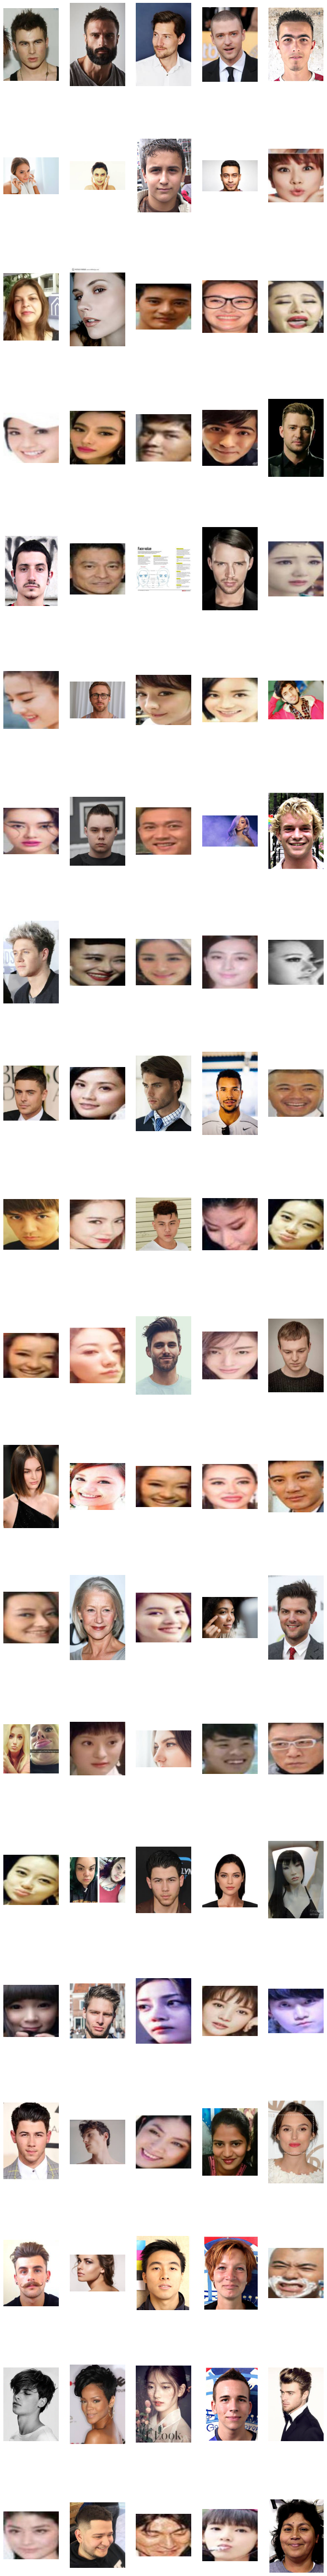

In [50]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join("/content/drive/My Drive/AI Dataset/data/without_mask",without_mask_images[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

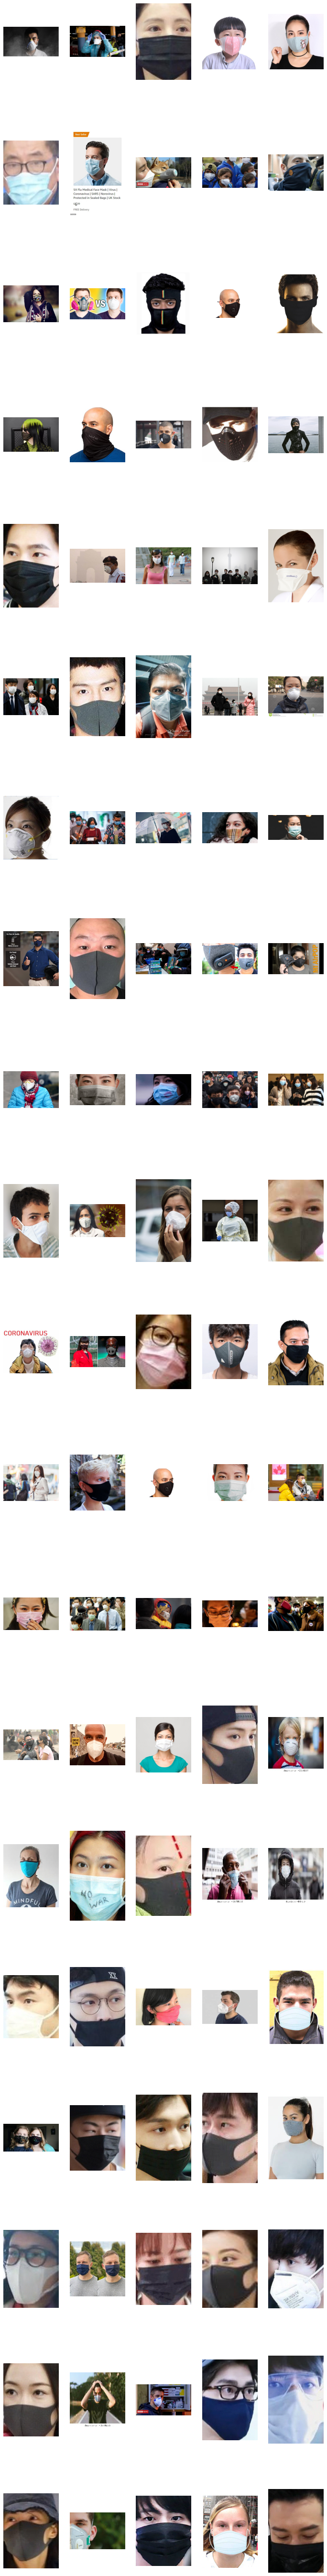

In [51]:
rows=20 #rows in subplots
cols=5 #columns in subplots

fig,ax = plt.subplots(rows,cols,figsize=(12,100))
r = 0
c = 0
for i in range(rows*cols):
    aa = plt.imread(os.path.join("/content/drive/My Drive/AI Dataset/data/with_mask",with_mask_images[i]))
    ax[r,c].axis("off")
    ax[r,c].imshow(aa)
    c+=1
    if c == cols:
        c=0
        r+=1
plt.show()

# Convolutional Neural Network Architecture and model training

In [ ]:
#requires modifications as per the image pixel and the number of labels
class CNN(nn.Module):

  def __init__(self):
    super(CNN, self).__init__()
    sef.conv_layer = nn. Sequential(
        nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),

        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2, stride=2),
    )

    self.fc_layer = nn.Sequential(
        nn.Dropout(p=0.1),
        nn.Linear(8 * 8 * 64, 1000),
        nn.ReLU(inplace=True),
        nn.Linear(1000, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.1),
        nn.Linear(512, 3)
    )

  def forward(self, x):
    #convoltional layers
    x = self.conv_layer(x)

    #flatten the layers
    x = x.view(x.size(0), -1)

    #fc layer
    x = self.fc_layer(x)

    return x

Hyper-paramaters definition

In [ ]:
num_epochs = 10
num_classes = 3
learning_rate = 0.001

In [ ]:
model = CNN()
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Convolutional Neural Network Model Evaluation